In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"fish[1].csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [3]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.isna().sum() 

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: >

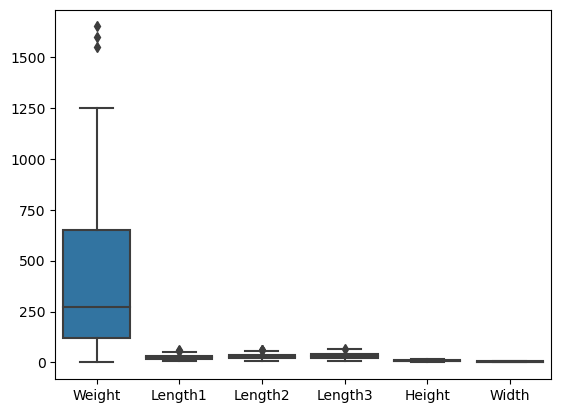

In [5]:
import seaborn as sns
sns.boxplot(data=df)

In [6]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

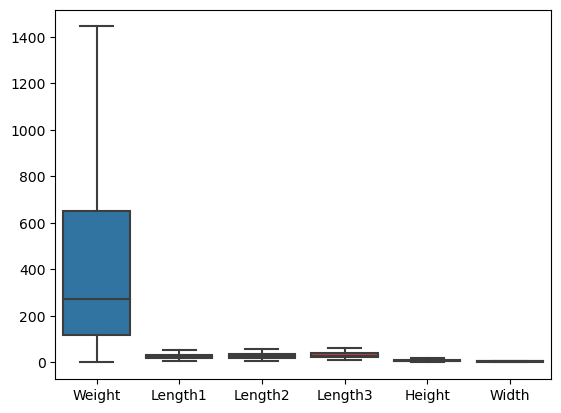

In [7]:
import seaborn as sns
sns.boxplot(data=df)

In [8]:
X = df.drop('Weight', axis= 1)
y = df[['Weight']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=134)

In [9]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Weight,Length1,Length2,Length3,Height,Width
140,950.0,48.3,51.7,55.1,8.9262,6.1712
141,1250.0,52.0,56.0,59.7,10.6863,6.9849
116,900.0,36.5,39.0,41.4,11.1366,7.4934
8,450.0,27.6,30.0,35.1,14.0049,4.8438
0,242.0,23.2,25.4,30.0,11.5200,4.0200


In [10]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.914629,0.917024,0.922502,0.757635,0.905353
Length1,0.914629,1.000000,0.999503,0.991042,0.668032,0.892799
Length2,0.917024,0.999503,1.000000,0.993098,0.681501,0.897803
Length3,0.922502,0.991042,0.993098,1.000000,0.742929,0.895059
Height,0.757635,0.668032,0.681501,0.742929,1.000000,0.793328
Width,0.905353,0.892799,0.897803,0.895059,0.793328,1.000000


In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
df.dropna(inplace=True)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

Length1    12520.014267
Length2    16270.427967
Length3     2401.384966
Height        54.543725
Width         95.277509
dtype: float64

In [13]:


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model = sfs(lreg, n_features_to_select = 3, direction='forward', scoring='r2')
Model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3,
                          scoring='r2')

In [14]:
Model.feature_names_in_

array(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype=object)

In [15]:
Model.get_feature_names_out()

array(['Length3', 'Height', 'Width'], dtype=object)

In [16]:
X_train = X_train.loc[:,['Length3', 'Height', 'Width']]
X_train.head()

,Length3,Height,Width
140,55.1,8.9262,6.1712
141,59.7,10.6863,6.9849
116,41.4,11.1366,7.4934
8,35.1,14.0049,4.8438
0,30.0,11.5200,4.0200


In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
X_train = X_train.loc[:,['Length3', 'Height', 'Width']]
X_train.head()

,Length3,Height,Width
140,55.1,8.9262,6.1712
141,59.7,10.6863,6.9849
116,41.4,11.1366,7.4934
8,35.1,14.0049,4.8438
0,30.0,11.5200,4.0200


In [19]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Length3,Height,Width,Weight
140,55.1,8.9262,6.1712,950.0
141,59.7,10.6863,6.9849,1250.0
116,41.4,11.1366,7.4934,900.0
8,35.1,14.0049,4.8438,450.0
0,30.0,11.5200,4.0200,242.0


In [20]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [21]:
np.round(Model3.intercept_,3)

array([-496.416])

In [22]:
np.round(Model3.coef_,4)

array([[16.8498,  4.4968, 73.1699]])

In [23]:
Model3.feature_names_in_

array(['Length3', 'Height', 'Width'], dtype=object)

In [24]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Weight - train.fitted_value,2)
train.head()

,Length3,Height,Width,Weight,fitted_value,Residual
140,55.1,8.9262,6.1712,950.0,923.69,26.31
141,59.7,10.6863,6.9849,1250.0,1068.66,181.34
116,41.4,11.1366,7.4934,900.0,799.54,100.46
8,35.1,14.0049,4.8438,450.0,512.41,-62.41
0,30.0,11.5200,4.0200,242.0,355.03,-113.03


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Weight,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  88.0


<Axes: title={'center': 'Height vs Weight'}, xlabel='Height', ylabel='Weight'>

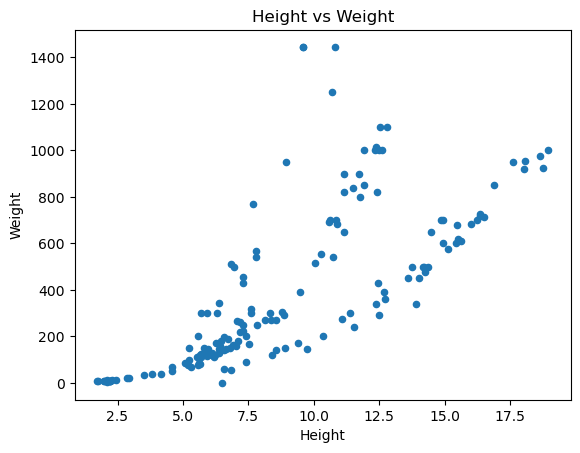

In [26]:
df.plot.scatter(x='Height', y='Weight', title='Height vs Weight')

<Axes: xlabel='fitted_value', ylabel='Residual'>

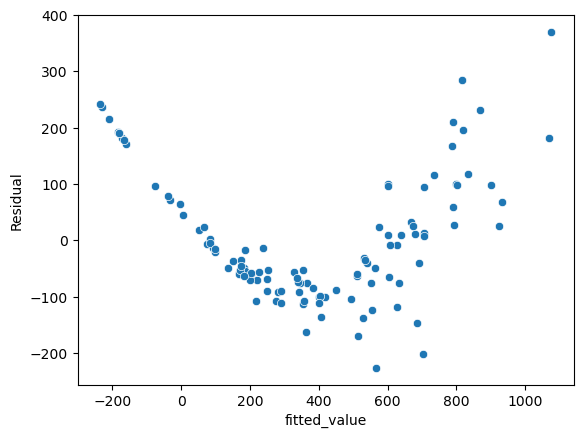

In [27]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

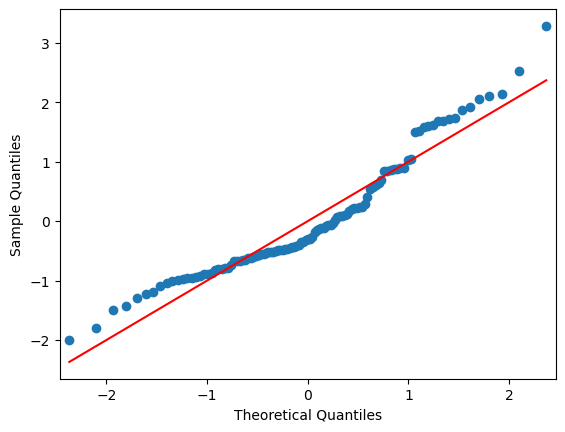

In [28]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<Axes: ylabel='Frequency'>

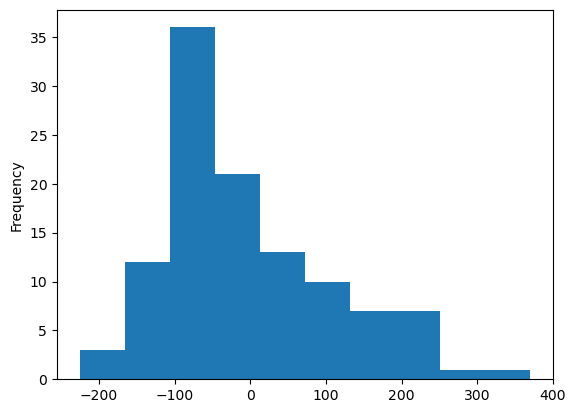

In [29]:
train['Residual'].plot.hist()

In [30]:
X_test = X_test.loc[:,['Length3', 'Height', 'Width']]
X_test.head()

,Length3,Height,Width
100,27.0,6.5610,4.2390
103,28.9,7.1672,4.3350
113,38.3,10.6091,6.7408
122,42.5,11.1350,6.6300
94,24.5,5.2185,3.6260


In [31]:
test = pd.concat([X_test,y_test], axis=1)
test.head()

,Length3,Height,Width,Weight
100,27.0,6.5610,4.2390,197.0
103,28.9,7.1672,4.3350,260.0
113,38.3,10.6091,6.7408,700.0
122,42.5,11.1350,6.6300,820.0
94,24.5,5.2185,3.6260,150.0


In [32]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Error / Residual'] = np.round(test.Weight - test.Prediction,2)
test.head()

,Length3,Height,Width,Weight,Prediction,Error / Residual
100,27.0,6.5610,4.2390,197.0,298.20,-101.20
103,28.9,7.1672,4.3350,260.0,339.96,-79.96
113,38.3,10.6091,6.7408,700.0,689.86,10.14
122,42.5,11.1350,6.6300,820.0,754.89,65.11
94,24.5,5.2185,3.6260,150.0,205.19,-55.19


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Weight,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  88.0


In [34]:
r2 = r2_score(test.Weight,test.Prediction)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  89.0


In [35]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Weight'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) #21

RMSE of Train Data :  112.79


In [36]:
model_mse = mean_squared_error(test['Weight'],test['Prediction'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) #21

RMSE of Test Data :  127.65
